In [1]:
import re
import nltk
nltk.download('stopwords')
import string
string.punctuation

stopword = nltk.corpus.stopwords.words('english')

def to_lower_case(text):
    return str(text).lower()

def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct

def tokenize(text):
    split=re.split("\W+",text) 
    return split

def remove_stopwords(text):
    text=[word for word in text if word not in stopword]
    return text


    
from transformers import BertTokenizer
tokenizer=BertTokenizer.from_pretrained('bert-base-uncased')
import torch
import numpy as np

def sen_to_vec(sentence):
    tokens=tokenizer.tokenize(sentence)
    tokens = ['[CLS]'] + tokens + ['[SEP]']
    T=52
    padded_tokens=tokens +['[PAD]' for _ in range(T-len(tokens))]
    attn_mask=[ 1 if token != '[PAD]' else 0 for token in padded_tokens  ]
    seg_ids=[0 for _ in range(len(padded_tokens))]
    sent_ids=tokenizer.convert_tokens_to_ids(padded_tokens)
    return np.array(sent_ids)

def sen_to_vec_cat(sentence):
    tokens=tokenizer.tokenize(sentence)
    tokens = ['[CLS]'] + tokens + ['[SEP]']
    T=8
    padded_tokens=tokens +['[PAD]' for _ in range(T-len(tokens))]
    attn_mask=[ 1 if token != '[PAD]' else 0 for token in padded_tokens  ]
    seg_ids=[0 for _ in range(len(padded_tokens))]
    sent_ids=tokenizer.convert_tokens_to_ids(padded_tokens)
    return np.array(sent_ids)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AyanSau\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [2]:
import pandas as pd

df1=pd.read_excel("MicroCenter_catagorized.xlsx").drop("Unnamed: 0",axis=1)
df1.head()

,Name-Link,Leasable or Non-Leasable,Category
0,SanDisk Clip Sport Go 32GB MP3 Player - Black,Leasable,MP3 Player
1,Inland 8GB MP3/MP4 Player - Black,Leasable,MP3 Player
2,SanDisk Clip Jam 8GB MP3 Player - Black,Leasable,MP3 Player
3,SanDisk Clip Sport Go 16GB MP3 Player - Black,Leasable,MP3 Player
4,SanDisk Clip Sport Plus 16GB MP3 Player - Blue,Leasable,MP3 Player


In [3]:
def categorize(string):
    string= "".join(str(string).split())
    if "Player" in string and "Chip" not in string:
        return "MP3 Player"
    elif "Chip" in string and "Player" in string:
        return "Chip"
    elif "WalkieTalkie" in string:
        return "Walkie Talkie"
    elif "Radio" in string:
        return "Radio"
    elif "DashCam" in string:
        return "Dash Cam"

    elif "Watch" in string or "Smartwatch" in string or "Tracker" in string and "Strap" not in string and "Charger" not in string:
        return "Watches"
    elif "SoundBar" in string or "Soundbar" in string or "Speaker" in string:
        return "Speakers"
    elif "Remote" in string:
        return "Remote"
    elif "Projector" in string and "Mount" not in string:
        return "Projectors"
    elif "Rack" in string or "Panel" in string or "Mount" in string or "Stand" in string or "Hanger" in string or "Shelf" in string or "Shockmount" in string or "Arm" in string:
        return "Mount"
    elif "Adapter" in string:
        return "Adapter"
    elif "Router" in string or "Modem" in string or "WiFi" in string:
        return "Router"
    elif "EthernetPorts" in string:
        return "Ethernet Ports"
    elif "Printer" in string and "Cartridge" not in string:
        return "Printer"
    elif "Cartridge" in string or "Ink" in string:
        return "Cartridge"
    elif "Mouse" in string or "GamingMouse" in string:
        return "Mouse"
    elif "Keyboard" in string or "GamingKeyboard" in string:
        return "KeyBoard"
    elif "Headset" in string or "Headphones" in string or "Earbuds" in string or "HeadPhone" in string:
        return "Head Phones"
    elif "Antenna" in string :
        return "Antenna"
    elif "Transmitter" in string:
        return "Transmitter"
    elif "Microphone" in string:
        return "Micro Phone"
    elif "Monitor" in string or "GamingMonitor" in string:
        return "Monitor"
    elif "DocumentScanner" in string:
        return "Scanner"
    elif "BarcodeScanner" in string:
        return "Bar Scanner"
    elif "Scanner" in string:
        return "Scanner"
    elif "Doc" in string or "Docking" in string:
        return "Docking Station"
    elif "Battery" in string:
        return "Battery"
    elif "Sling" in string or "Lock" in string or "Sleeves" in string or "Sleeve" in string or "Case" in string or "Backpack" in string or "backpack" in string or "BACKPACK" in string or "Briefcase" in string or "for" in string or "bag" in string:
        return "Back Packs and Cases"
    elif "ScreenFor" in string or "Screens"in string  or "Screen"in string  or "Display" in string:
        return "Screens"
    elif "Charger" in string or "Chargers" in string:
        return "Charger"
    elif "LaptopComputer" in string:
        return "Laptops"
    elif "DesktopComputer" in string or "Workstation" in string or "GamingPC" in string:
        return "Desktops"
    elif "Camera" in string or "Cameras" in string or "GoPro" in string or "Canon" in string and "Mount" not in string and "Stand" not in string and "Hanger" not in string and "Shelf" not in string and "Shockmount" not in string:
        return "Camera"
    elif "GraphicsCard" in string:
        return "Graphic Card"
    elif "Motherboard" in string:
        return "MotherBoard"
    elif "SolidStateDrive" in string or "HardDrive" in string and "Enclosure" not in string:
        return "Memmory Drives"
    elif "PowerSupply" in string:
        return "Power Supply"
    elif "Enclosure" in string:
        return "Drive Enclosures"
    elif "Switch" in string:
        return "Switch"
    elif "Tripod" in string:
        return "Tripod Stand"
    elif "TV" in string and "Mount" not in string and "Stand" not in string and "Hanger" not in string and "Shelf" not in string and "Shockmount" not in string:
        return "TV"
    elif "FlashDrive" in string:
        return "Flash Drive"
    elif "MemoryCard" in string:
        return "Memory Card"
    elif "CardReader" in string:
        return "Card Reader"
    elif "Cordless" in string or "Phone" in string:
        return "Phone"
    elif "Polaroid" in string or "Lens" in string or "Tripod" in string or "Stand" in string or "STAND" in string:
        return "Camera-Accessories"
    elif "Headphone" in string or "Airpod" in string or "Buds" in string:
        return "HeadPhones"
    elif "Audio" in string or "Speaker" in string or "Stream" in string or "Woofer" in string or "Sound" in string or "Wave" in string or "Subwoofer" in string or "Mic" in string or "Attenuator" in string or "Volume" in string or "Amplifier" in string or "Hub" in string or "speaker" in string:
        return "Speakers"
    elif "Processor" in string:
        return "Processor"
    elif "Cooler" in string:
        return "Cooler"
    elif "HDD" in string or "Drive" in string or "Memory" in string or "Seagate" in string:
        return "Hard-Drives"
    elif "Burner" in string or "Writer" in string:
        return "DVD/CD Writer"
    elif "Keypad" in string:
        return "Keypad"
    elif "Pen" in string or "Stylus" in string:
        return "Stylus"
    elif "Cord" in string or "Male" in string or "Female" in string or "Connectors" in string or "Splitter" or "Converter" in string:
        return "Cables"
    elif "Electronics" in string or "BREADBOARDS" in string or "Breadboard" in string or "BreadBoard" in string or "breadboard" in string or "Servo" in string or "Schmartboard" in string or "Arduino" in string:
        return "Electronics"
    else:
        pass

In [4]:
df1["Category"]=df1["Name-Link"].apply(categorize)
df1.head()

,Name-Link,Leasable or Non-Leasable,Category
0,SanDisk Clip Sport Go 32GB MP3 Player - Black,Leasable,MP3 Player
1,Inland 8GB MP3/MP4 Player - Black,Leasable,MP3 Player
2,SanDisk Clip Jam 8GB MP3 Player - Black,Leasable,MP3 Player
3,SanDisk Clip Sport Go 16GB MP3 Player - Black,Leasable,MP3 Player
4,SanDisk Clip Sport Plus 16GB MP3 Player - Blue,Leasable,MP3 Player


In [5]:
def IS_Leasable(string):
    if string=="Back Packs and Cases" or string=="Battery" or string=="Mount" or string== "Tripod Stand":
        return "False"
    else:
        return "True"

In [6]:
df1["Is_Leasable"]=df1["Category"].apply(IS_Leasable)
df1=df1.drop("Leasable or Non-Leasable",axis=1)
df1.head()

,Name-Link,Category,Is_Leasable
0,SanDisk Clip Sport Go 32GB MP3 Player - Black,MP3 Player,True
1,Inland 8GB MP3/MP4 Player - Black,MP3 Player,True
2,SanDisk Clip Jam 8GB MP3 Player - Black,MP3 Player,True
3,SanDisk Clip Sport Go 16GB MP3 Player - Black,MP3 Player,True
4,SanDisk Clip Sport Plus 16GB MP3 Player - Blue,MP3 Player,True


In [7]:
df1=df1.applymap(to_lower_case)
df1=df1.applymap(remove_punctuation)
df1=df1.applymap(tokenize)
df1=df1.applymap(remove_stopwords)
df1=df1.applymap(lambda x:" ".join(x))

In [8]:
df1["cat_vectors"]=df1["Category"].apply(sen_to_vec_cat)
df1["sent_vectors"]=df1["Name-Link"].apply(sen_to_vec)

In [9]:
df1.head()

,Name-Link,Category,Is_Leasable,cat_vectors,sent_vectors
0,sandisk clip sport go 32gb mp3 player black,mp3 player,true,"[101, 23378, 2447, 102, 0, 0, 0, 0]","[101, 5472, 20573, 12528, 4368, 2175, 3590, 18..."
1,inland 8gb mp3mp4 player black,mp3 player,true,"[101, 23378, 2447, 102, 0, 0, 0, 0]","[101, 9514, 1022, 18259, 23378, 8737, 2549, 24..."
2,sandisk clip jam 8gb mp3 player black,mp3 player,true,"[101, 23378, 2447, 102, 0, 0, 0, 0]","[101, 5472, 20573, 12528, 9389, 1022, 18259, 2..."
3,sandisk clip sport go 16gb mp3 player black,mp3 player,true,"[101, 23378, 2447, 102, 0, 0, 0, 0]","[101, 5472, 20573, 12528, 4368, 2175, 2385, 18..."
4,sandisk clip sport plus 16gb mp3 player blue,mp3 player,true,"[101, 23378, 2447, 102, 0, 0, 0, 0]","[101, 5472, 20573, 12528, 4368, 4606, 2385, 18..."


<AxesSubplot:>

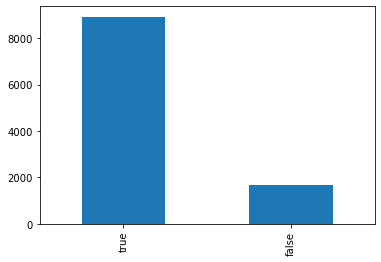

In [10]:
df1["Is_Leasable"].value_counts().plot(kind='bar')

In [11]:
df2=pd.read_excel("Pottery_Barn_Classified.xlsx").drop("Unnamed: 0",axis=1)
df2.head()

,name,Category,Is_Leasable
0,Jacquelyn Medallion Organic Shower Curtain,bath-all-bath-linens,False
1,Lila Organic Shower Curtain,bath-all-bath-linens,False
2,Classic Double Wide Organic Loop Bath Mat,bath-all-bath-linens,False
3,Aerospin™ Luxe Organic Towels,bath-all-bath-linens,False
4,Hydrocotton Organic Towel Bundle - Set of 12,bath-all-bath-linens,False


In [12]:
df_test=df2.head(n=500)
list1=df_test["Category"].tolist()

from itertools import combinations
import math
from scipy import spatial

def vectorize(sentences):
    return list(map(sen_to_vec,sentences))

#(v1 dot v2)/{||v1||*||v2||}
def cosine_similarity(array):
    v1=list(array[0])
    v2=list(array[1])
    
    return 1 - spatial.distance.cosine(v1, v2)
 
# comb = combinations(df["Name-Link"].tolist(), 2)

comb = combinations(df_test["name"].tolist(), 2) 
comb_list=list(map(lambda x:list(x),comb))

df_to_find_sim=pd.DataFrame()
df_to_find_sim["Combinations"]=comb_list
df_to_find_sim["Arrays"]=df_to_find_sim["Combinations"].apply(vectorize)

df_to_find_sim["similarity"]=df_to_find_sim["Arrays"].apply(cosine_similarity)

df_to_find_sim=df_to_find_sim[df_to_find_sim["similarity"]<=0.75]
list_prod= [item for sublist in df_to_find_sim["Combinations"].tolist() for item in sublist]

df2=pd.DataFrame()
df2["name"]=list(set(list_prod))
df2["Category"]=list1[:446]



In [13]:
def is_leasable(string):
    string= "".join(str(string).split())
    if "Table" in string or "Chair" in string or "Mirror" in string or "Bookcase" in string or "Cabinet" in string or "Bench" in string or "Mirror" in string or "Fan" in string and "Tablet" not in string:
        return True
    else:
        return False
 
df2["Is_Leasable"]=df2["name"].apply(is_leasable)


In [14]:
df2=df2.applymap(to_lower_case)
df2=df2.applymap(remove_punctuation)
df2=df2.applymap(tokenize)
df2=df2.applymap(remove_stopwords)
df2=df2.applymap(lambda x:" ".join(x))

In [15]:
df2["cat_vectors"]=df2["Category"].apply(sen_to_vec_cat)
df2["sent_vectors"]=df2["name"].apply(sen_to_vec)

In [16]:
df2.head()

,name,Category,Is_Leasable,cat_vectors,sent_vectors
0,k hall milk ultimate spa set,bathallbathlinens,false,"[101, 7198, 8095, 14479, 27766, 10224, 2015, 102]","[101, 1047, 2534, 6501, 7209, 12403, 2275, 102..."
1,monogrammed paperwhite oval soap set,bathallbathlinens,false,"[101, 7198, 8095, 14479, 27766, 10224, 2015, 102]","[101, 18847, 13113, 7583, 3259, 2860, 16584, 2..."
2,small elevated canvas laundry basket wheels,bathallbathlinens,false,"[101, 7198, 8095, 14479, 27766, 10224, 2015, 102]","[101, 2235, 8319, 10683, 14533, 10810, 7787, 1..."
3,bliss handcrafted linencotton quilt shams,bathallbathlinens,false,"[101, 7198, 8095, 14479, 27766, 10224, 2015, 102]","[101, 13670, 2192, 10419, 2098, 17517, 13124, ..."
4,bryce buffalo check cotton duvet cover,bathallbathlinens,false,"[101, 7198, 8095, 14479, 27766, 10224, 2015, 102]","[101, 19757, 6901, 4638, 6557, 4241, 19510, 31..."


In [17]:
df1 = df1.rename(columns={'Name-Link': 'name'})
df_final=pd.concat([df1, df2])

df_final

,name,Category,Is_Leasable,cat_vectors,sent_vectors
0,sandisk clip sport go 32gb mp3 player black,mp3 player,true,"[101, 23378, 2447, 102, 0, 0, 0, 0]","[101, 5472, 20573, 12528, 4368, 2175, 3590, 18..."
1,inland 8gb mp3mp4 player black,mp3 player,true,"[101, 23378, 2447, 102, 0, 0, 0, 0]","[101, 9514, 1022, 18259, 23378, 8737, 2549, 24..."
2,sandisk clip jam 8gb mp3 player black,mp3 player,true,"[101, 23378, 2447, 102, 0, 0, 0, 0]","[101, 5472, 20573, 12528, 9389, 1022, 18259, 2..."
3,sandisk clip sport go 16gb mp3 player black,mp3 player,true,"[101, 23378, 2447, 102, 0, 0, 0, 0]","[101, 5472, 20573, 12528, 4368, 2175, 2385, 18..."
4,sandisk clip sport plus 16gb mp3 player blue,mp3 player,true,"[101, 23378, 2447, 102, 0, 0, 0, 0]","[101, 5472, 20573, 12528, 4368, 4606, 2385, 18..."
...,...,...,...,...,...
441,windowpane cotton duvet cover,beddingallbedding,false,"[101, 2793, 4667, 8095, 8270, 4667, 102, 0]","[101, 3332, 9739, 2063, 6557, 4241, 19510, 310..."
442,lila organic shower curtain,beddingallbedding,false,"[101, 2793, 4667, 8095, 8270, 4667, 102, 0]","[101, 19286, 7554, 6457, 11002, 102, 0, 0, 0, ..."
443,1000threadcount sateen sheet set,beddingallbedding,false,"[101, 2793, 4667, 8095, 8270, 4667, 102, 0]","[101, 6694, 2705, 16416, 16409, 21723, 2938, 1..."
444,honeycomb cotton duvet cover,beddingallbedding,false,"[101, 2793, 4667, 8095, 8270, 4667, 102, 0]","[101, 6861, 18274, 6557, 4241, 19510, 3104, 10..."


<AxesSubplot:>

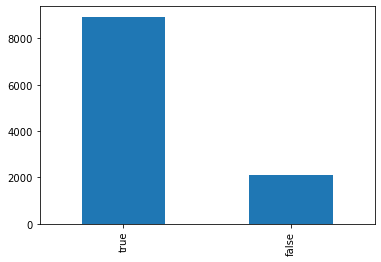

In [18]:
df_final["Is_Leasable"].value_counts().plot(kind='bar')

In [19]:
df_final.to_excel("Final_file.xlsx")

In [20]:
def label_encode(string):
    if string=="false":
        return 0
    else:
        return 1
    
df_final["Is_leasable_encode"]=df_final["Is_Leasable"].apply(label_encode)
df_final

,name,Category,Is_Leasable,cat_vectors,sent_vectors,Is_leasable_encode
0,sandisk clip sport go 32gb mp3 player black,mp3 player,true,"[101, 23378, 2447, 102, 0, 0, 0, 0]","[101, 5472, 20573, 12528, 4368, 2175, 3590, 18...",1
1,inland 8gb mp3mp4 player black,mp3 player,true,"[101, 23378, 2447, 102, 0, 0, 0, 0]","[101, 9514, 1022, 18259, 23378, 8737, 2549, 24...",1
2,sandisk clip jam 8gb mp3 player black,mp3 player,true,"[101, 23378, 2447, 102, 0, 0, 0, 0]","[101, 5472, 20573, 12528, 9389, 1022, 18259, 2...",1
3,sandisk clip sport go 16gb mp3 player black,mp3 player,true,"[101, 23378, 2447, 102, 0, 0, 0, 0]","[101, 5472, 20573, 12528, 4368, 2175, 2385, 18...",1
4,sandisk clip sport plus 16gb mp3 player blue,mp3 player,true,"[101, 23378, 2447, 102, 0, 0, 0, 0]","[101, 5472, 20573, 12528, 4368, 4606, 2385, 18...",1
...,...,...,...,...,...,...
441,windowpane cotton duvet cover,beddingallbedding,false,"[101, 2793, 4667, 8095, 8270, 4667, 102, 0]","[101, 3332, 9739, 2063, 6557, 4241, 19510, 310...",0
442,lila organic shower curtain,beddingallbedding,false,"[101, 2793, 4667, 8095, 8270, 4667, 102, 0]","[101, 19286, 7554, 6457, 11002, 102, 0, 0, 0, ...",0
443,1000threadcount sateen sheet set,beddingallbedding,false,"[101, 2793, 4667, 8095, 8270, 4667, 102, 0]","[101, 6694, 2705, 16416, 16409, 21723, 2938, 1...",0
444,honeycomb cotton duvet cover,beddingallbedding,false,"[101, 2793, 4667, 8095, 8270, 4667, 102, 0]","[101, 6861, 18274, 6557, 4241, 19510, 3104, 10...",0


In [21]:
df_final=df_final[["sent_vectors","cat_vectors","Is_leasable_encode"]]

df_final["sent_vectors"]=df_final["sent_vectors"].apply(lambda x:np.array(x))
df_final["cat_vectors"]=df_final["cat_vectors"].apply(lambda x:np.array(x))

<ipython-input-21-93080880924d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["sent_vectors"]=df_final["sent_vectors"].apply(lambda x:np.array(x))
<ipython-input-21-93080880924d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["cat_vectors"]=df_final["cat_vectors"].apply(lambda x:np.array(x))


In [22]:
# Generate indices for splits

test_ind = round(len(df_final)*0.25)
train_ind = test_ind + round(len(df_final)*0.01)
unlabeled_ind = train_ind + round(len(df_final)*0.74)


# Partition the data

test = df_final.iloc[:test_ind]
train = df_final.iloc[test_ind:train_ind]
unlabeled = df_final.iloc[train_ind:unlabeled_ind]


# Assign data to train, test, and unlabeled sets

X_train = train.drop('Is_leasable_encode', axis=1)
y_train = train.Is_leasable_encode

X_unlabeled = unlabeled.drop('Is_leasable_encode', axis=1)

X_test = test.drop('Is_leasable_encode', axis=1)
y_test = test.Is_leasable_encode


# Check dimensions of data after splitting

print(f"X_train dimensions: {X_train.shape}")
print(f"y_train dimensions: {y_train.shape}\n")

print(f"X_test dimensions: {X_test.shape}")
print(f"y_test dimensions: {y_test.shape}\n")

print(f"X_unlabeled dimensions: {X_unlabeled.shape}")

X_train dimensions: (110, 2)
y_train dimensions: (110,)

X_test dimensions: (2761, 2)
y_test dimensions: (2761,)

X_unlabeled dimensions: (8173, 2)


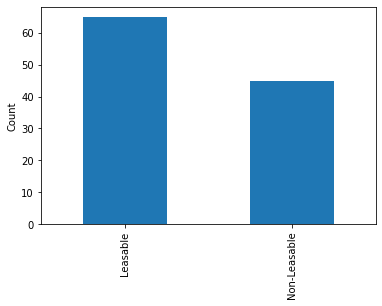

In [23]:
# Visualize class distribution
import matplotlib.pyplot as plt

y_train.value_counts().plot(kind='bar')
plt.xticks([0,1], ['Leasable', 'Non-Leasable'])
plt.ylabel('Count');

In [24]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix

clf = LogisticRegression(max_iter=1000)

clf.fit(X_train, y_train)
y_hat_test = clf.predict(X_test)
y_hat_train = clf.predict(X_train)

train_f1 = f1_score(y_train, y_hat_train)
test_f1 = f1_score(y_test, y_hat_test)

print(f"Train f1 Score: {train_f1}")
print(f"Test f1 Score: {test_f1}")

plot_confusion_matrix(clf, X_test, y_test, cmap='Blues', normalize='true',
                     display_labels=['Leasable', 'Non-Leasable']);

ValueError: setting an array element with a sequence.